# 沃爾曼二分區模式A偏最小平方演算法(Wold’s Two Block, Mode A Partial Least Square)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

# Training Data

In [2]:
N=3000
CLASS=2
d=6
t=6
X=np.zeros((N,d))
Y=np.zeros((N,t))
base=random.normal(loc=1, scale=10, size=N)
for i in range(0,d):
    X[:,i]=12*np.sin(base)**(i+1)+random.rand(N)
for i in range(0,t):
    Y[:,i]=12*np.cos(base)**(i+1)+random.rand(N)

# Plot Distribition

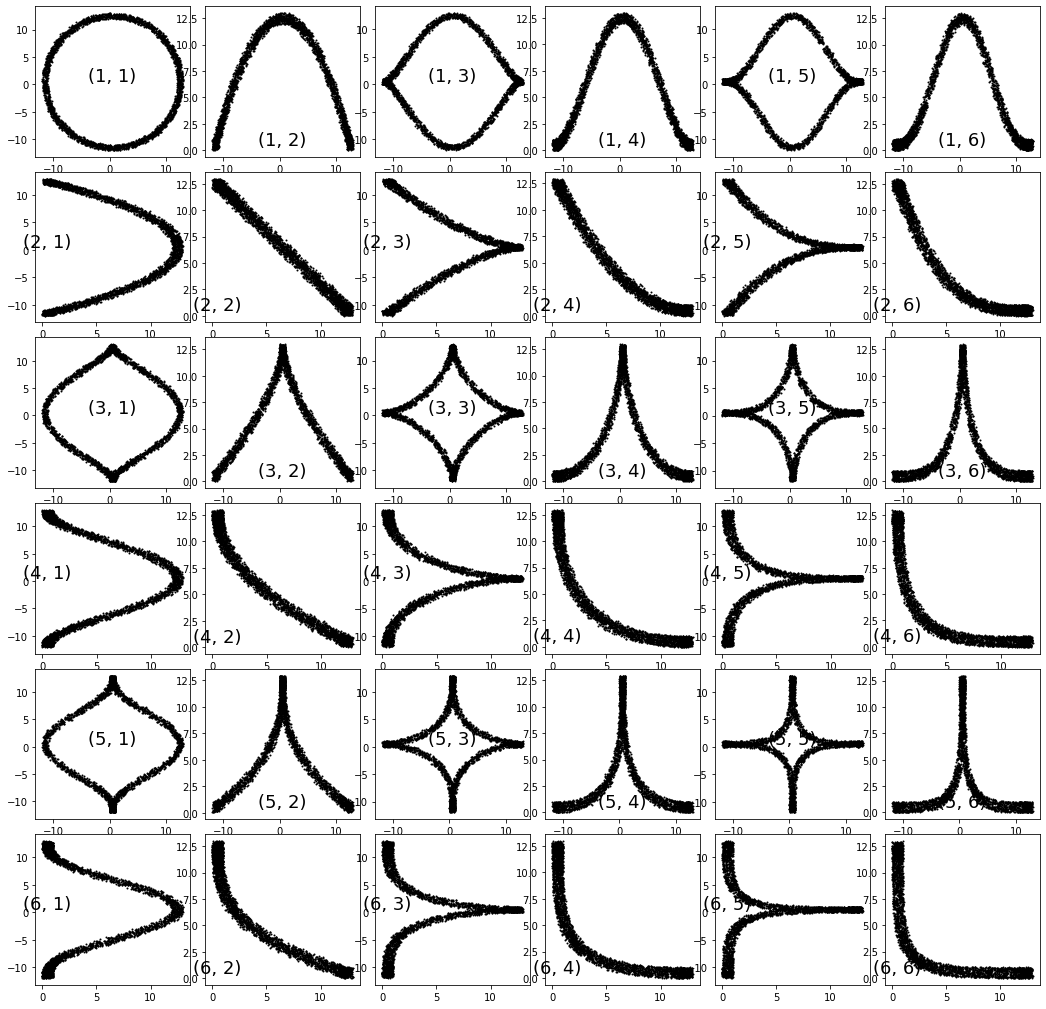

In [3]:
plt.rcParams["figure.figsize"] = (18,18)
fig , ax = plt.subplots()
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(1,d+1):
    for j in range(1,t+1):
        plt.subplot(d, t, (i-1)*t+j)
        plt.plot(X[:,i-1],Y[:,j-1],"ko",markersize=1)
        plt.text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
plt.show()

# PLS-W2A

In [4]:
XX=X
YY=Y
T=6
XI=np.zeros((N,T))
OMEGA=np.zeros((N,T))
GAMMA=np.zeros((d,T))
DELTA=np.zeros((t,T))
UU=np.zeros((d,T))
VV=np.zeros((t,T))
for i in range(0,T):
    CCM=np.dot(XX.T,YY)
    U, S, V = np.linalg.svd(CCM)
    u,v=U[:,0],V[0,:]
    UU[:,i]=u
    VV[:,i]=v
    xi=np.dot(XX,u)
    omega=np.dot(YY,v)
    XI[:,i]=xi
    OMEGA[:,i]=omega
    gamma=np.dot(xi[None,:],XX)/np.dot(xi,xi)
    delta=np.dot(omega[None,:],YY)/np.dot(omega,omega)
    GAMMA[:,i]=gamma
    DELTA[:,i]=delta
    XX=XX-np.dot(xi[:,None],gamma)
    YY=YY-np.dot(omega[:,None],delta)
P=np.dot(UU,np.linalg.inv(np.dot(GAMMA.T,UU)))
Q=np.dot(VV,np.linalg.inv(np.dot(DELTA.T,VV)))

# Plot Result

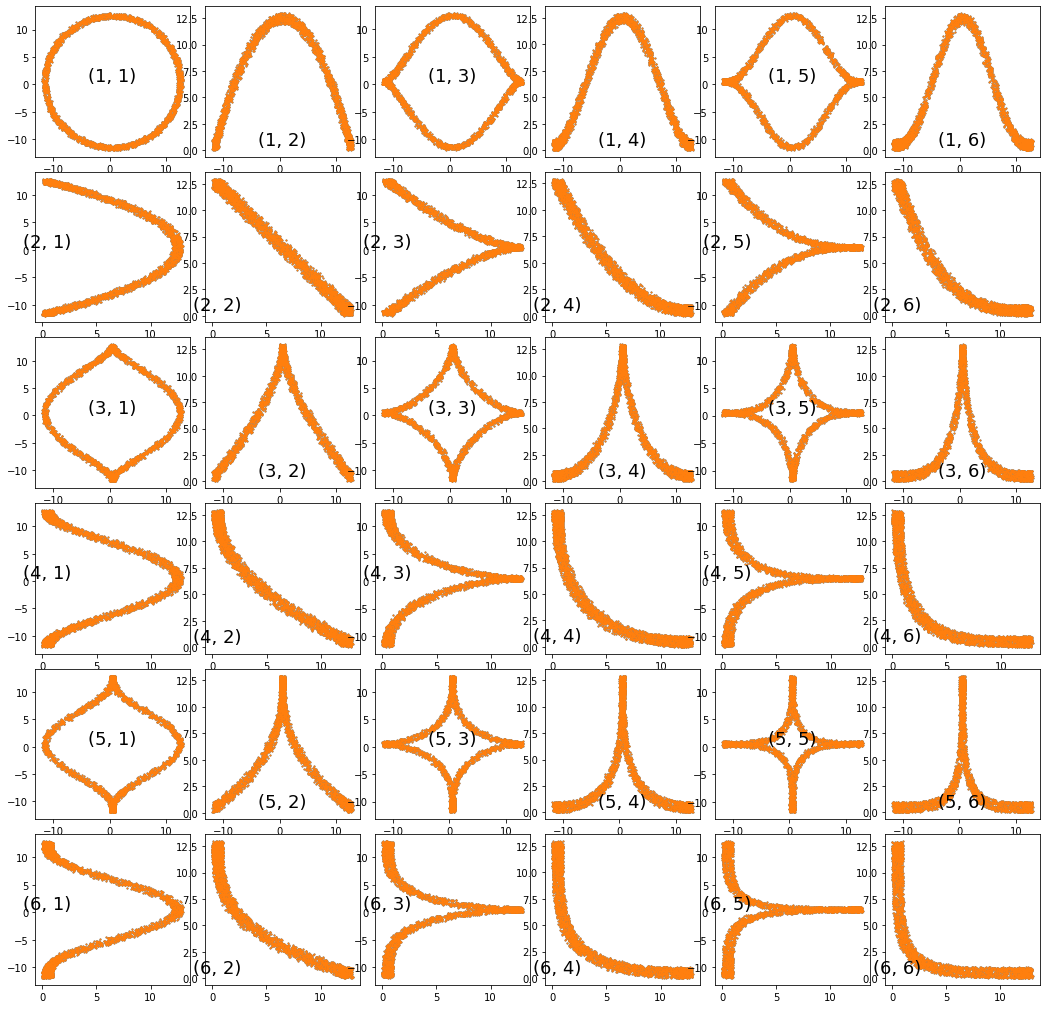

In [5]:
plt.rcParams["figure.figsize"] = (18,18)
TRAIN="Training Data"
TEST="Testing Data"
X_fit=np.dot(XI,GAMMA.T)
Y_fit=np.dot(OMEGA,DELTA.T)
SIZE=3
fig , ax = plt.subplots()
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(1,d+1):
    for j in range(1,t+1):
        plt.subplot(d, t, (i-1)*t+j)
        plt.plot(X[:,i-1],Y[:,j-1],"o",markersize=1)
        plt.plot(X_fit[:,i-1],Y_fit[:,j-1],"o",markersize=1)
        plt.text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
plt.show()